# Simulating effective resistanace using NPL setup
<img src="./support-files/cqps-resistance.svg"/>

<IPython.core.display.Javascript object>


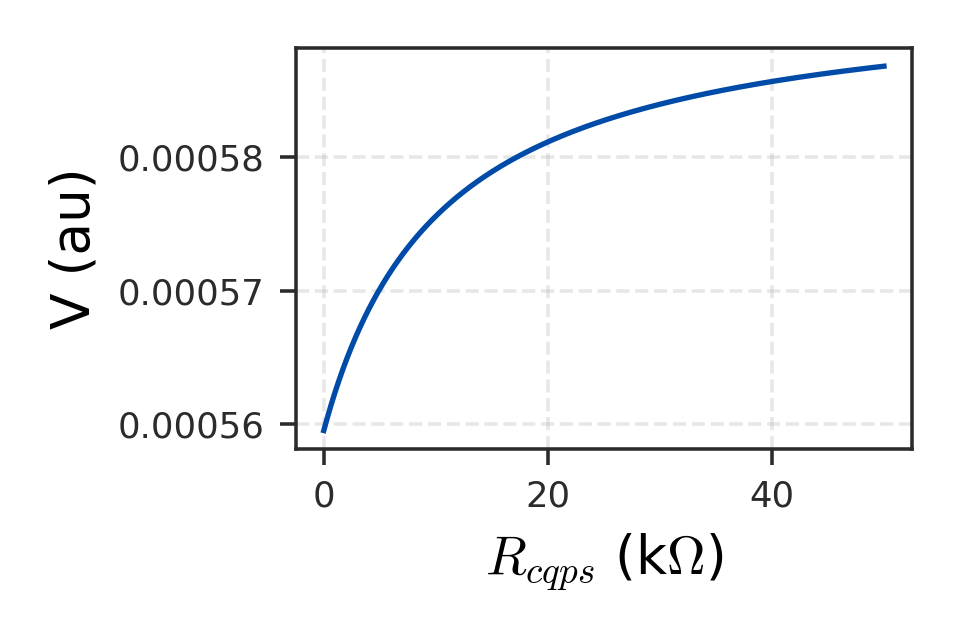

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit.mplstyle")
import ipywidgets

MOhm = 10**6
kOhm = 10**3

R1 = 1*MOhm
R2 = 100
R_meander = 5*kOhm

R_cqps = np.linspace(0, 50*kOhm, 1001)

def eval_voltage(R1: float, R2: float):
    R =  R2 * (2 * R_meander + R_cqps) / (R2 + 2 * R_meander + R_cqps)    
    V = R / (R1 + R)
    return V

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
simulation_graph, = ax.plot(R_cqps/kOhm, eval_voltage(R1, R2))
ax.set_xlabel("$R_{cqps}$ (k$\Omega$)", fontsize=12)
ax.set_ylabel("V (au)", fontsize=12)
plt.tight_layout()

In [3]:
def update(R1: float, R2: float):
    R1 = R1*MOhm
    simulation_graph.set_ydata(eval_voltage(R1, R2))
    ax.relim()
    ax.autoscale_view()
    plt.tight_layout()
    
R1_widget = ipywidgets.FloatSlider(
    min=0, max=1, step=0.1,
    description="$R_1 (M\Omega)$", value=R1/MOhm,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)
R2_widget = ipywidgets.FloatSlider(
    min=0, max=1000, step=1,
    description="$R_2 (\Omega)$", value=R2,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)

ui = ipywidgets.GridspecLayout(2, 1)
ui[0,0] = R1_widget
ui[1,0] = R2_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "R1": R1_widget,
        "R2": R2_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=1.0, description='$R_1 (M\\Omega)$', layout=Layout(grid_area='widge…

Output()